## Practice

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

In [2]:
X, y = load_iris(return_X_y=True)

In [3]:
kmeans = KMeans(n_clusters=5, init='random', n_init=50, max_iter=500, random_state=10)

In [4]:
kmeans.fit(X, y)

KMeans(init='random', max_iter=500, n_clusters=5, n_init=50, random_state=10)

In [5]:
kmeans.inertia_

46.446182051282065

In [6]:
all_inertias = []
for k in range(1, 12):
  kmeans = KMeans(n_clusters=k, init='random', n_init=50, max_iter=500, random_state=10)
  kmeans.fit(X, y)
  all_inertias.append(kmeans.inertia_)

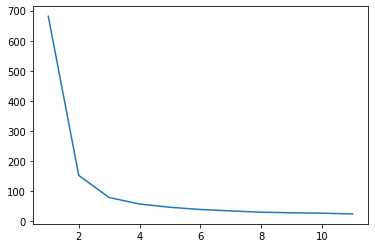

In [7]:
plt.plot(range(1,12), all_inertias)

In [8]:
all_inertias[2] # inertia at k=3

78.851441426146

### Q5-Q6

In [9]:
import pandas as pd

In [10]:
data = load_iris(as_frame=True)

In [11]:
data.data.dropna()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [12]:
from sklearn.cluster import AgglomerativeClustering
agg = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
agg.fit_predict(data.data)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [13]:
agg.n_leaves_

150

## Graded

In [14]:
live = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/00488/Live_20210128.csv")

In [15]:
live.shape

(7050, 16)

In [16]:
live['status_type'].value_counts()

photo     4288
video     2334
status     365
link        63
Name: status_type, dtype: int64

In [17]:
live.dropna(axis=1, inplace=True)

In [18]:
target = live.pop('status_type')

In [19]:
live.drop(columns=['status_id', 'status_published'], inplace=True)

In [20]:
from sklearn.preprocessing import LabelEncoder
target = LabelEncoder().fit_transform(target)

In [21]:
target

array([3, 1, 3, ..., 1, 1, 1])

In [22]:
from sklearn.preprocessing import StandardScaler
live = StandardScaler().fit_transform(live)

In [23]:
live

array([[ 0.64610394,  0.32335035,  1.6868788 , ...,  0.07671305,
         0.47357035, -0.15574803],
       [-0.17319166, -0.25220622, -0.3041444 , ..., -0.17600986,
        -0.152587  , -0.15574803],
       [-0.00673846,  0.01308938,  0.12901714, ...,  0.07671305,
        -0.152587  , -0.15574803],
       ...,
       [-0.49312768, -0.25220622, -0.3041444 , ..., -0.17600986,
        -0.152587  , -0.15574803],
       [ 0.26131603, -0.23871662, -0.13695924, ..., -0.17600986,
        -0.152587  , -0.15574803],
       [-0.46070173, -0.25220622, -0.3041444 , ..., -0.17600986,
        -0.152587  , -0.15574803]])

In [24]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=10)
kmeans.fit_predict(live, target)
kmeans.inertia_

48278.09824220544

In [25]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4, random_state=10)
predictions = kmeans.fit_predict(live, target)

In [26]:
target

array([3, 1, 3, ..., 1, 1, 1])

In [27]:
# how many targets are same as predictions?
np.where(target==predictions)[0].shape

(4421,)

In [28]:
from sklearn.cluster import AgglomerativeClustering
agg = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
agg.fit_predict(live, target)
agg.n_leaves_

7050

In [29]:
predictions = agg.fit_predict(live, target)

In [30]:
from sklearn.metrics import classification_report
print(classification_report(target, predictions))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        63
           1       0.04      0.00      0.00      4288
           2       0.20      0.21      0.20       365
           3       0.31      0.83      0.45      2334

    accuracy                           0.28      7050
   macro avg       0.13      0.26      0.16      7050
weighted avg       0.13      0.28      0.16      7050

